# Week4 - HW 2

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemanda) for at least 10 days and not more than 40 days. 

1. Create two bar graphs of the power consumption per hour. 
    a. One bar graph has 24 bars; 
    b. one bar graph has 24 times number of days bars. 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [32]:
import pandas as pd

path = r"C:\Users\KARAN\Desktop\UMBC STUDY\601\Week 4\data\RollingSystemDemand_20210928_0451.csv"
dframe = pd.read_csv(path,names=['HDR','Date&Time','Demand'])

dframe

,HDR,Date&Time,Demand
0,HDR,ROLLING SYSTEM DEMAND,NaN
1,VD,20191220000000,28564.0
2,VD,20191220000500,28573.0
3,VD,20191220001000,28706.0
4,VD,20191220001500,28785.0
...,...,...,...
1997,VD,20191226222000,28341.0
1998,VD,20191226222500,28189.0
1999,VD,20191226223000,27947.0
2000,VD,20191226223500,27721.0


In [33]:
#remove necessary empty rows

dframe.dropna(axis = 0,how='any',inplace = True)

dframe['Date&Time'] = pd.to_datetime(dframe['Date&Time'])
dframe['Date'] = pd.to_datetime(dframe['Date&Time'],errors='coerce').dt.date
dframe['Hour'] = pd.to_datetime(dframe['Date&Time'],errors='coerce').dt.hour
dframe['Hours'] = pd.to_datetime(dframe['Date&Time'],errors='coerce').dt.hour
dframe['Demand']= dframe['Demand'].astype(int)

df = dframe.groupby('Hour').mean()
df['Hours'] = df['Hours']+1

df

,Demand,Hours
Hour,,
0,26103.178571,1
1,25824.833333,2
2,25168.738095,3
3,24792.952381,4
4,24434.380952,5
5,24634.023810,6
6,26552.404762,7
7,29383.000000,8
8,32173.797619,9


<h2><b>a. One bar graph has 24 bars;</h2></b>

Text(0.5, 1.0, '24 hours Graph')

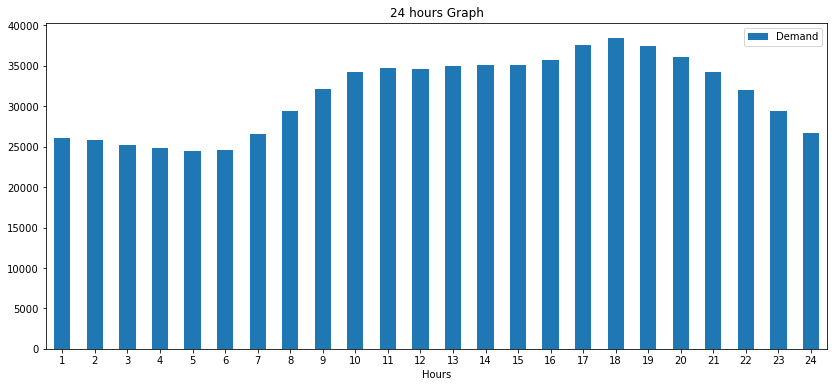

In [40]:
daily = df.plot.bar(x='Hours',y='Demand',rot = 0,figsize=(14,6))
plt.title('24 hours Graph')


In [3]:
new_df = dframe.groupby(['Date','Hour']).mean()
new_df['Hours'] = new_df['Hours']+1
new_df

Demand  Hours
Date       Hour                     
2019-12-20 0     29041.333333      1
           1     28870.083333      2
           2     28276.166667      3
           3     27614.083333      4
           4     27090.500000      5
...                       ...    ...
2019-12-26 18    34346.916667     19
           19    33367.750000     20
           20    32053.416667     21
           21    30134.500000     22
           22    28374.875000     23

[167 rows x 2 columns]

Text(0.5, 1.0, 'Cummulative Graph')

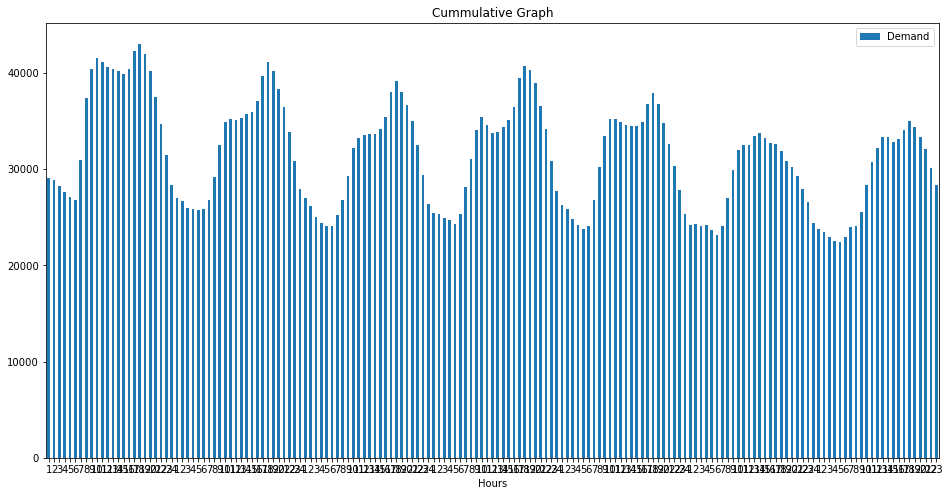

In [39]:
cummulative = new_df.plot.bar(x='Hours',y='Demand',rot = 0,figsize=(16,8))
plt.title('Cummulative Graph')